In [1]:
from glob import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
datadct = {}
for r in ['rl0','rl1','rl2']:
    datadct[r]={}
    for i in glob(f'*{r}/*results.json'):
        datadct[r][i.split('/')[0].split('_')[0]]=pd.read_json(i,orient='index').rename(columns={0:i.split('/')[0].split('_')[0]})
        

In [29]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: 'DataFrame', id_vars=None, value_vars=None, var_name=None, value_name: 'Hashable' = 'value', col_level=None, ignore_index: 'bool' = True) -> 'DataFrame'
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : scalar, tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : scalar, tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar, default None
        Name to use for the 'va

In [43]:
pd.concat(datadct['rl0'].values(),axis=1).T.sort_index()

,MSE_train,R2_train,MAE_train,MSE_test,R2_test,MAE_test
ol1,0.000331,0.150297,0.014620,0.000329,0.153269,0.014554
ol2,0.000212,0.456783,0.010697,0.000210,0.459283,0.010664
ol3,0.000237,0.391834,0.011573,0.000233,0.399678,0.011601


<Axes: xlabel='index', ylabel='value'>

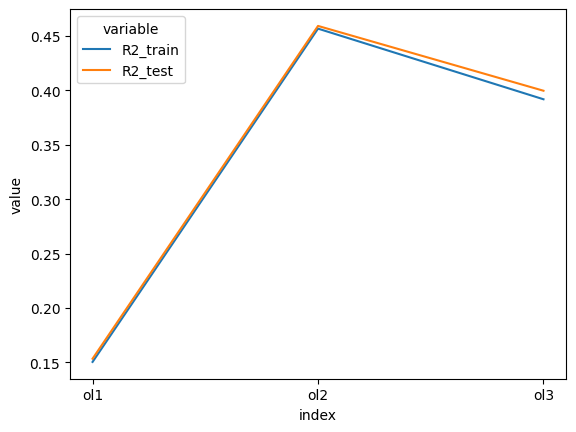

In [38]:
sns.lineplot(pd.concat(datadct['rl0'].values(),axis=1).sort_index(axis=1).T.reset_index().melt(id_vars=['index'], value_vars=['R2_train','R2_test']),x='index',y='value',hue='variable')
# sns.lineplot(pd.concat(datadct['rl1'].values(),axis=1).sort_index(axis=1).T.reset_index().melt(id_vars=['index'], value_vars=['R2_train','R2_test']),x='index',y='value',hue='variable')
# sns.lineplot(pd.concat(datadct['rl2'].values(),axis=1).sort_index(axis=1).T.reset_index().melt(id_vars=['index'], value_vars=['R2_train','R2_test']),x='index',y='value',hue='variable')

<Axes: xlabel='index', ylabel='value'>

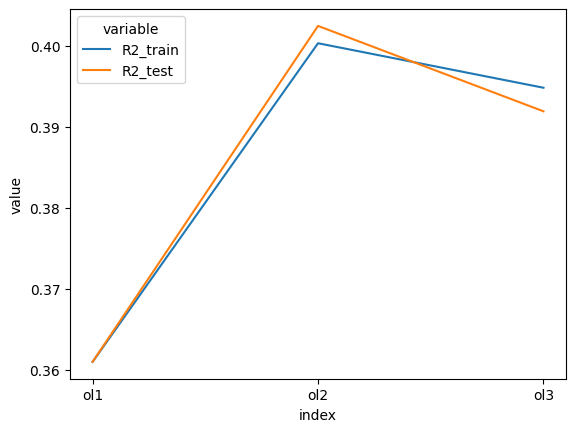

<Axes: xlabel='index', ylabel='value'>

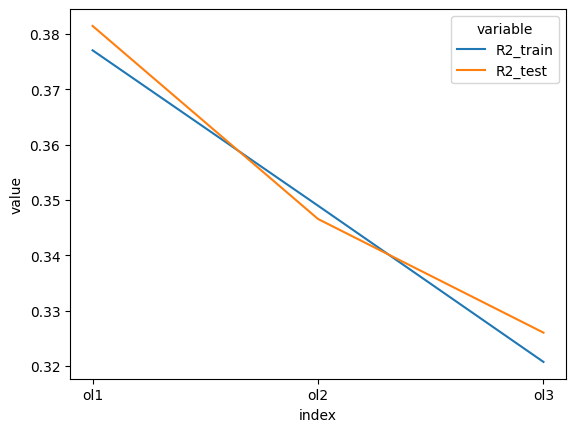